## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [107]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [4]:
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [5]:
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
df2 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t')

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [8]:
df3 = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [9]:
df3

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [10]:
df3['vote_count'].value_counts()

1       6541
2       3044
3       1757
4       1347
5        969
        ... 
2328       1
6538       1
489        1
2600       1
2049       1
Name: vote_count, Length: 1693, dtype: int64

In [11]:
df4 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [12]:
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [13]:
# Initial look at the im.db database to gather information on the schema.

schema_df5 = pd.read_sql("""

SELECT *
    FROM sqlite_master

""", conn)

schema_df5

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [14]:
print(schema_df5['sql'].iloc[1])

CREATE TABLE "directors" (
"movie_id" TEXT,
  "person_id" TEXT
)


In [15]:
# This pulls movie_basics table

table1 = pd.read_sql("""

SELECT *
FROM movie_basics

""", conn)

movie_basics = table1

In [16]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
# This pulls the directors table

table2 = pd.read_sql("""

SELECT *
FROM directors

""", conn)

directors = table2
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [18]:
# This pulls the known for table

table3 = pd.read_sql("""

SELECT *
FROM known_for

""", conn)

known_for = table3

In [19]:
# Pulls in the movie_akas table

pd.read_sql("""

SELECT *
FROM movie_akas

""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [20]:
# Initial look at movie_ratings table

table4 = pd.read_sql("""

SELECT *
FROM movie_ratings

""", conn)

movie_ratings = table4
table4

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [21]:
# Initial look at persons table

table5 = pd.read_sql("""

SELECT *
FROM persons

""", conn)

persons = table5
table5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [22]:
# Initial look at principals table

table6 = pd.read_sql("""

SELECT *
FROM principals

""", conn)

principals = table6
table6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [23]:
# Initial look at writers table

pd.read_sql("""

SELECT *
FROM writers

""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [24]:
# Attempt at combining the Movie_Basics table with Directors table on Movie_ID

table1 = """
SELECT *
FROM movie_basics
JOIN directors
    USING(movie_id);
"""
firstjoin = pd.read_sql(table1, conn)

# This initially works

In [25]:
# First table success, combining Movie_ratings now with the combined table above

#table2 = """
#SELECT *
#FROM movie_ratings
#JOIN firstjoin
#    USING(movie_id);
#"""
#pd.read_sql(table2, conn)

# This breaks, believe it's an issue moving between SQL and Pandas

In [26]:
# We have the 5 tables that we want to merge in pandas DF's now

movie_basics
directors
movie_ratings
persons
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [27]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [28]:
# movie_basics does not appear to have repeated values

In [29]:
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [30]:
firstmerge = movie_basics.merge(directors, on="movie_id", how="left")
firstmerge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411
...,...,...,...,...,...,...,...
296896,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,nm10538612
296897,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490
296898,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149
296899,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490


In [31]:
firstmerge.duplicated().sum()

127639

In [32]:
secondmerge = firstmerge.merge(movie_ratings, on="movie_id", how="left")
secondmerge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,7.2,43.0
...,...,...,...,...,...,...,...,...,...
296896,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,nm10538612,NaN,NaN
296897,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490,NaN,NaN
296898,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN
296899,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490,NaN,NaN


In [33]:
thirdmerge = secondmerge.merge(persons, on="person_id", how="left")
thirdmerge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,7.2,43.0,Mani Kaul,1944.0,2011.0,"director,writer,actor"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296896,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,nm10538612,NaN,NaN,Kiran Gawade,NaN,NaN,None
296897,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490,NaN,NaN,Angela Gurgel,NaN,NaN,"director,writer"
296898,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director"
296899,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490,NaN,NaN,Angela Gurgel,NaN,NaN,"director,writer"


In [34]:
fourthmerge = thirdmerge.merge(principals, on="person_id", how="left")
fourthmerge

,movie_id_x,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession,movie_id_y,ordering,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",tt0063540,5.0,director,None,None
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",tt0063540,5.0,director,None,None
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",tt0063540,5.0,director,None,None
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",tt0063540,5.0,director,None,None
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,7.2,43.0,Mani Kaul,1944.0,2011.0,"director,writer,actor",tt0066787,5.0,director,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028228,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",tt10118270,6.0,director,co-director,None
1028229,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",tt9910688,5.0,director,co-director,None
1028230,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",tt9916754,6.0,director,co-director,None
1028231,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",tt7378802,6.0,director,None,None


In [35]:
fourthmerge.duplicated().sum()

459168

In [36]:
sorted(fourthmerge['start_year'].unique())

[2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2115]

In [37]:
fourthmerge[fourthmerge['start_year'] > 2023]

,movie_id_x,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession,movie_id_y,ordering,category,job,characters
17354,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17355,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385148,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",nm0000116,NaN,NaN,James Cameron,1954.0,NaN,"writer,producer,director",tt2004304,2.0,self,None,"[""Himself""]"
385149,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",nm0000116,NaN,NaN,James Cameron,1954.0,NaN,"writer,producer,director",tt2169432,1.0,self,None,"[""Himself""]"
385150,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",nm0000116,NaN,NaN,James Cameron,1954.0,NaN,"writer,producer,director",tt1927124,1.0,self,None,"[""Himself""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784321,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy",nm0946734,NaN,NaN,David Yates,1963.0,NaN,"director,producer,writer",tt4123432,1.0,director,None,None
784322,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy",nm0946734,NaN,NaN,David Yates,1963.0,NaN,"director,producer,writer",tt3183660,5.0,director,None,None
784323,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy",nm0946734,NaN,NaN,David Yates,1963.0,NaN,"director,producer,writer",tt4123430,5.0,director,None,None
784324,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy",nm0946734,NaN,NaN,David Yates,1963.0,NaN,"director,producer,writer",tt6149054,1.0,director,None,None


In [38]:
fourthmerge_yearclean = fourthmerge[fourthmerge['start_year'] <= 2023]

In [39]:
fourthmerge_yearclean

,movie_id_x,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession,movie_id_y,ordering,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",tt0063540,5.0,director,None,None
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",tt0063540,5.0,director,None,None
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",tt0063540,5.0,director,None,None
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77.0,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",tt0063540,5.0,director,None,None
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,7.2,43.0,Mani Kaul,1944.0,2011.0,"director,writer,actor",tt0066787,5.0,director,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028228,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",tt10118270,6.0,director,co-director,None
1028229,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",tt9910688,5.0,director,co-director,None
1028230,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",tt9916754,6.0,director,co-director,None
1028231,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",tt7378802,6.0,director,None,None


In [40]:
# In case we want to filter the data further 
fourthmerge_yearclean = fourthmerge_yearclean[fourthmerge_yearclean['start_year'] > 2018]

In [41]:
# want to just merge movie_basics with movie_ratings
database_merge = movie_basics.merge(movie_ratings, on="movie_id", how="left")
database_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [42]:
database_merge.duplicated().sum()

0

In [43]:
database_merge = database_merge[database_merge['start_year'] <= 2023]
database_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [44]:
# Check to see if movie_id is repeated
database_merge['movie_id'].duplicated().sum()

0

In [45]:
# DF1 is movie_gross.csv
# DF4 is movie_budgets.csv

df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [47]:
df1['title'].duplicated().sum()

1

In [48]:
df1_duplicated = df1[df1['title'].duplicated()]
df1_duplicated

,title,studio,domestic_gross,foreign_gross,year
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [49]:
df1[df1['title'] == "Bluebeard"]

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [50]:
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [51]:
df4['movie'].duplicated().sum()

84

In [52]:
# Checking if any values in movie budgets have duplicated values
df4_duplicated = df4[df4['movie'].duplicated()]
df4_duplicated

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
273,74,"May 19, 1998",Godzilla,"$125,000,000","$136,314,294","$376,000,000"
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"
484,85,"Jul 8, 2005",Fantastic Four,"$87,500,000","$154,696,080","$333,132,750"
543,44,"May 7, 1999",The Mummy,"$80,000,000","$155,385,488","$416,385,488"
707,8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000"
...,...,...,...,...,...,...
5668,69,"Nov 16, 1942",Cat People,"$134,000","$4,000,000","$8,000,000"
5676,77,"Oct 1, 1968",Night of the Living Dead,"$114,000","$12,087,064","$30,087,064"
5677,78,"Feb 8, 1915",The Birth of a Nation,"$110,000","$10,000,000","$11,000,000"
5699,100,"Aug 30, 1972",The Last House on the Left,"$87,000","$3,100,000","$3,100,000"


In [53]:
# attempt to separate release_date to have a separate column for year
df4['year'] = pd.DatetimeIndex(df4['release_date']).year
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


In [54]:
# test merge of DF1 (movie gross) and DF4(movie budgets), based on the release_data and movie name conditions
csvmerge = pd.merge(df1, df4, how = 'left', left_on=['year', 'title'], right_on=['year', 'movie'])
csvmerge

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47.0,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,38.0,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,27.0,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
...,...,...,...,...,...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
csvmerge['title'].duplicated().sum()

1

In [56]:
csvmerge[csvmerge['title'] == "Bluebeard"]

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
317,Bluebeard,Strand,33500.0,5200,2010,NaN,NaN,NaN,NaN,NaN,NaN
3045,Bluebeard,WGUSA,43100.0,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# We have our two tables (database_merge 146k rows, and csvmerge 3387 rows, that we want to combine based on the movie titles)

dataset = pd.merge(database_merge, csvmerge, how="left", left_on="primary_title", right_on="title")
dataset

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146135,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146136,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146137,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146138,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
dataset_duplicated = dataset[dataset['movie_id'].duplicated()]
dataset_duplicated

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
40403,tt2442772,Bluebeard,Barbazul,2012,98.0,Horror,6.1,19.0,Bluebeard,WGUSA,43100.0,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
112559,tt6599340,Bluebeard,Haebing,2017,117.0,Thriller,6.4,1269.0,Bluebeard,WGUSA,43100.0,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
dataset.isna().sum()

movie_id                  0
primary_title             0
original_title           21
start_year                0
runtime_minutes       31733
genres                 5407
averagerating         72282
numvotes              72282
title                142774
studio               142777
domestic_gross_x     142798
foreign_gross        144097
year                 142774
id                   144635
release_date         144635
movie                144635
production_budget    144635
domestic_gross_y     144635
worldwide_gross      144635
dtype: int64

In [60]:
dataset.to_csv('masterdatasetdraft.csv')

In [61]:
!ls

CONTRIBUTING.md              masterdatasetcleaned.csv
LICENSE.md                   masterdatasetdraft.csv
README.md                    movie_data_erd.jpeg
albert_phase1_notebook.ipynb zippedData
awesome.gif


In [62]:
dataset_cleaned = dataset.dropna(subset=['production_budget'])

In [63]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 54 to 146074
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1505 non-null   object 
 1   primary_title      1505 non-null   object 
 2   original_title     1505 non-null   object 
 3   start_year         1505 non-null   int64  
 4   runtime_minutes    1417 non-null   float64
 5   genres             1485 non-null   object 
 6   averagerating      1350 non-null   float64
 7   numvotes           1350 non-null   float64
 8   title              1505 non-null   object 
 9   studio             1505 non-null   object 
 10  domestic_gross_x   1504 non-null   float64
 11  foreign_gross      1320 non-null   object 
 12  year               1505 non-null   float64
 13  id                 1505 non-null   float64
 14  release_date       1505 non-null   object 
 15  movie              1505 non-null   object 
 16  production_budget  15

In [64]:
dataset_cleaned.to_csv('masterdatasetcleaned.csv')

In [65]:
!ls

CONTRIBUTING.md              masterdatasetcleaned.csv
LICENSE.md                   masterdatasetdraft.csv
README.md                    movie_data_erd.jpeg
albert_phase1_notebook.ipynb zippedData
awesome.gif


In [66]:
dataset_cleaned

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Jurassic World,Uni.,652300000.0,"1,019.4",2015.0,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,The Rum Diary,FD,13100000.0,10800000,2011.0,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732"
67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570.0,The Three Stooges,Fox,44300000.0,10500000,2012.0,4.0,"Apr 13, 2012",The Three Stooges,"$30,000,000","$44,338,224","$54,052,249"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144721,tt9703646,Into the Woods,Into the Woods,2018,NaN,"Fantasy,Horror",NaN,NaN,Into the Woods,BV,128000000.0,85100000,2014.0,77.0,"Dec 25, 2014",Into the Woods,"$56,200,000","$128,002,372","$213,116,401"
145132,tt9776362,Never Let Me Go,Never Let Me Go,2019,NaN,Drama,NaN,NaN,Never Let Me Go,FoxS,2400000.0,7000000,2010.0,29.0,"Sep 15, 2010",Never Let Me Go,"$15,000,000","$2,434,652","$11,173,718"
145499,tt9827712,The First Time,The First Time,2018,90.0,Drama,NaN,NaN,The First Time,Gold.,22800.0,NaN,2012.0,67.0,"Oct 19, 2012",The First Time,"$2,000,000","$17,061","$17,061"
145660,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama",4.7,14.0,Sisters,Uni.,87000000.0,18000000,2015.0,57.0,"Dec 18, 2015",Sisters,"$30,000,000","$87,044,645","$106,030,660"


In [70]:
dataset_cleaned.reset_index()

,index,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
2,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Jurassic World,Uni.,652300000.0,"1,019.4",2015.0,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,The Rum Diary,FD,13100000.0,10800000,2011.0,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732"
4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570.0,The Three Stooges,Fox,44300000.0,10500000,2012.0,4.0,"Apr 13, 2012",The Three Stooges,"$30,000,000","$44,338,224","$54,052,249"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,144721,tt9703646,Into the Woods,Into the Woods,2018,NaN,"Fantasy,Horror",NaN,NaN,Into the Woods,BV,128000000.0,85100000,2014.0,77.0,"Dec 25, 2014",Into the Woods,"$56,200,000","$128,002,372","$213,116,401"
1501,145132,tt9776362,Never Let Me Go,Never Let Me Go,2019,NaN,Drama,NaN,NaN,Never Let Me Go,FoxS,2400000.0,7000000,2010.0,29.0,"Sep 15, 2010",Never Let Me Go,"$15,000,000","$2,434,652","$11,173,718"
1502,145499,tt9827712,The First Time,The First Time,2018,90.0,Drama,NaN,NaN,The First Time,Gold.,22800.0,NaN,2012.0,67.0,"Oct 19, 2012",The First Time,"$2,000,000","$17,061","$17,061"
1503,145660,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama",4.7,14.0,Sisters,Uni.,87000000.0,18000000,2015.0,57.0,"Dec 18, 2015",Sisters,"$30,000,000","$87,044,645","$106,030,660"


In [71]:
dataset_cleaned.value_counts(subset = ['genres']).head(30)

genres                    
Drama                         114
Adventure,Animation,Comedy     61
Documentary                    59
Comedy,Drama,Romance           57
Comedy                         51
Comedy,Drama                   48
Action,Adventure,Sci-Fi        44
Drama,Romance                  37
Comedy,Romance                 30
Action,Adventure,Fantasy       28
Horror,Mystery,Thriller        27
Horror                         26
Action,Crime,Drama             26
Action,Comedy,Crime            25
Drama,Thriller                 24
Action,Adventure,Drama         22
Biography,Drama,History        21
Crime,Drama,Thriller           20
Horror,Thriller                20
Action,Crime,Thriller          19
Action,Thriller                18
Biography,Comedy,Drama         17
Action,Adventure,Comedy        17
Thriller                       16
Biography,Drama                15
Crime,Drama                    14
Action,Drama,Thriller          13
Action,Adventure,Animation     13
Drama,Horror,Mystery 

In [72]:
top10genre_series = dataset_cleaned['genres'].value_counts()[:10]
top10genre_series

Drama                         114
Adventure,Animation,Comedy     61
Documentary                    59
Comedy,Drama,Romance           57
Comedy                         51
Comedy,Drama                   48
Action,Adventure,Sci-Fi        44
Drama,Romance                  37
Comedy,Romance                 30
Action,Adventure,Fantasy       28
Name: genres, dtype: int64

In [74]:
top10genre_genres = list(top10genre_series.index)
top10genre_values = list(top10genre_series.values)

print(top10genre_genres)
print(top10genre_values)

['Drama', 'Adventure,Animation,Comedy', 'Documentary', 'Comedy,Drama,Romance', 'Comedy', 'Comedy,Drama', 'Action,Adventure,Sci-Fi', 'Drama,Romance', 'Comedy,Romance', 'Action,Adventure,Fantasy']
[114, 61, 59, 57, 51, 48, 44, 37, 30, 28]


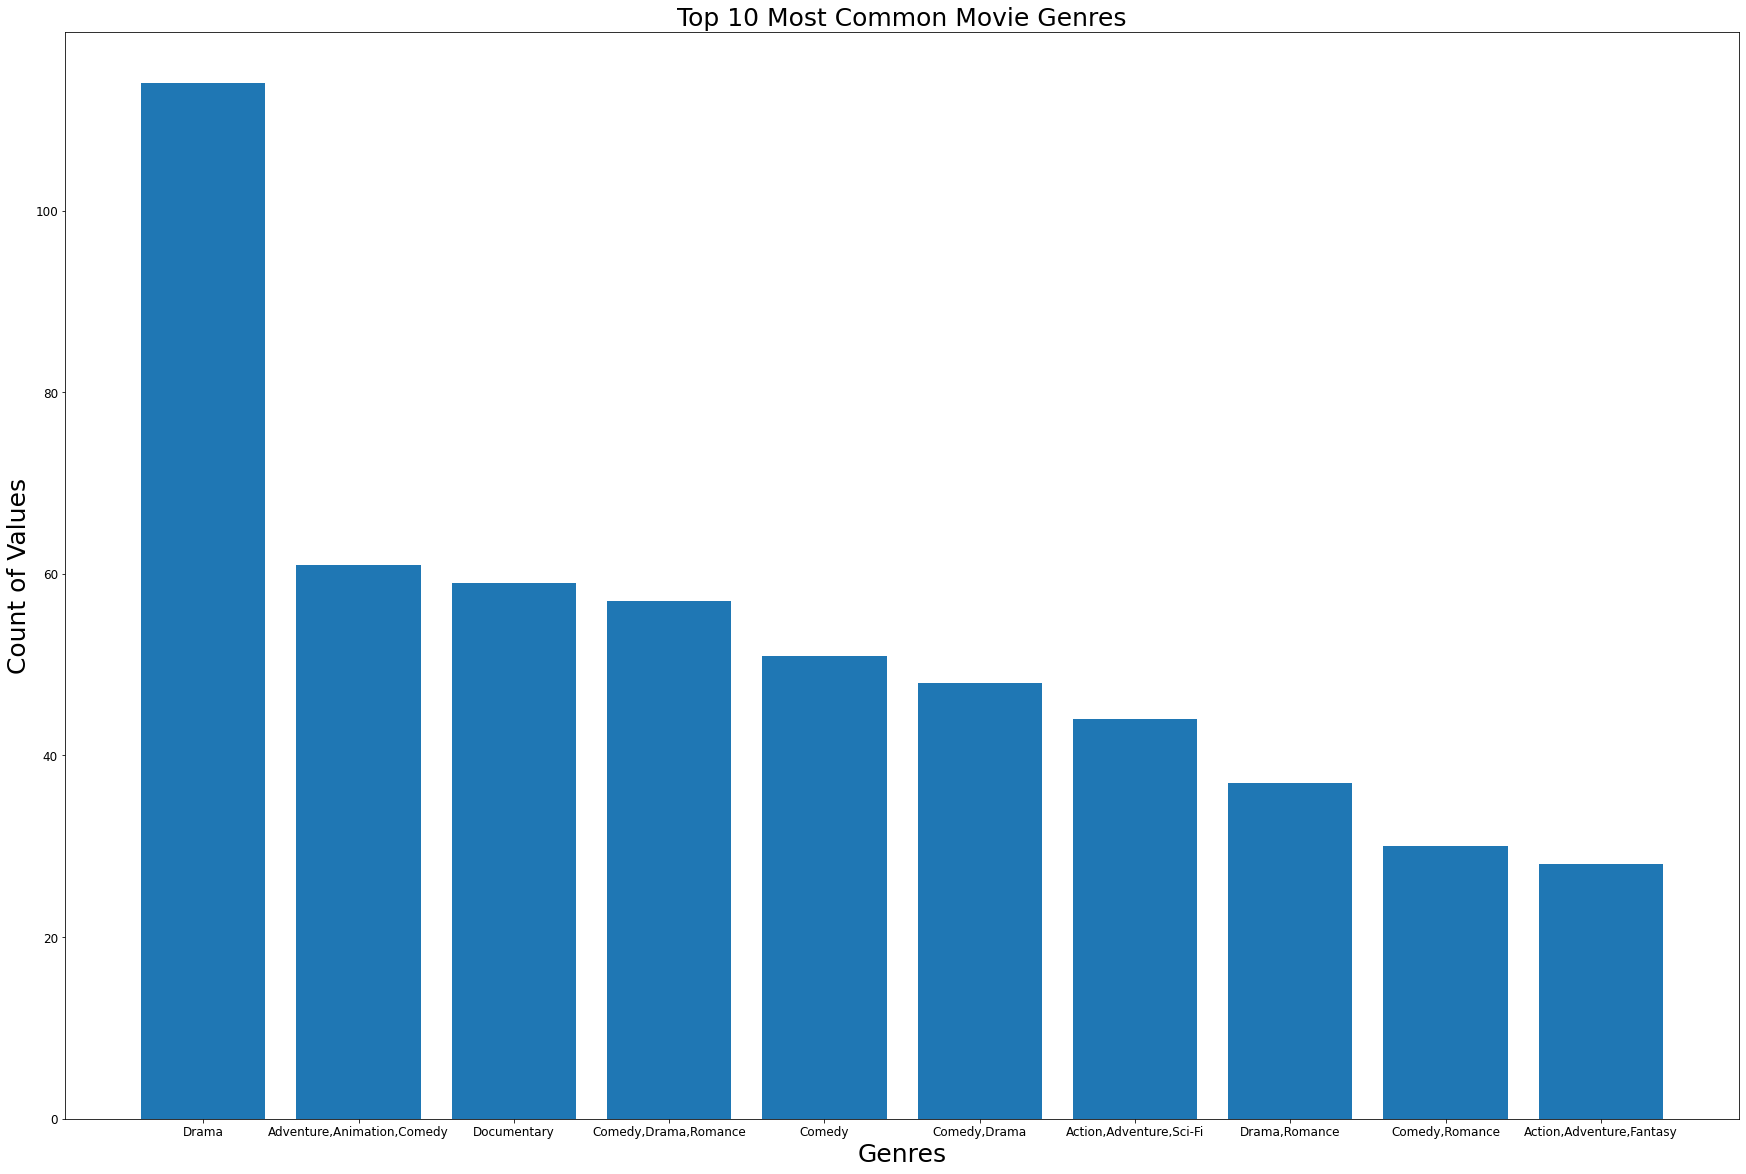

In [105]:
bar_chart_title = "Top 10 Most Common Movie Genres"

fig, ax = plt.subplots(figsize = (30, 20))

ax.bar(top10genre_genres, top10genre_values)

ax.set_ylabel("Count of Values", fontsize = 25)
ax.set_xlabel("Genres", fontsize = 25)
ax.set_title(bar_chart_title, fontsize = 25)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.savefig('moviegenres.jpeg', bbox_inches = 'tight');

In [96]:
!ls

CONTRIBUTING.md              masterdatasetdraft.csv
LICENSE.md                   movie_data_erd.jpeg
README.md                    moviegenres.jpeg
albert_phase1_notebook.ipynb moviegenres.pdf
awesome.gif                  moviegenres.png
masterdatasetcleaned.csv     zippedData


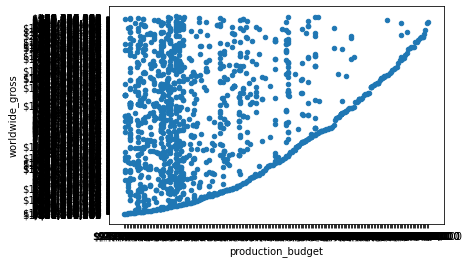

In [115]:
# scatter plot with averagerating vs. worldwide_gross

dataset_cleaned.plot.scatter(x = 'production_budget', y = "worldwide_gross");